In [2]:
import numpy as np
import matplotlib as mpl
import os
from matplotlib import pyplot
from util import findClosestCentroids,computeCentroids,runkMeans,kMeansInitCentroids
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import cluster



C:\Users\Lales\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lales\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Lales\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


## K_means from scratch

In [40]:
K = 5
max_iters = 10
A = mpl.image.imread(os.path.join('images', 'nature.jpg'))/255
X = A.reshape(-1, 3)
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids,
                                 findClosestCentroids,
                                 computeCentroids,
                                 max_iters)

X_recovered = centroids[idx, :].reshape(A.shape)



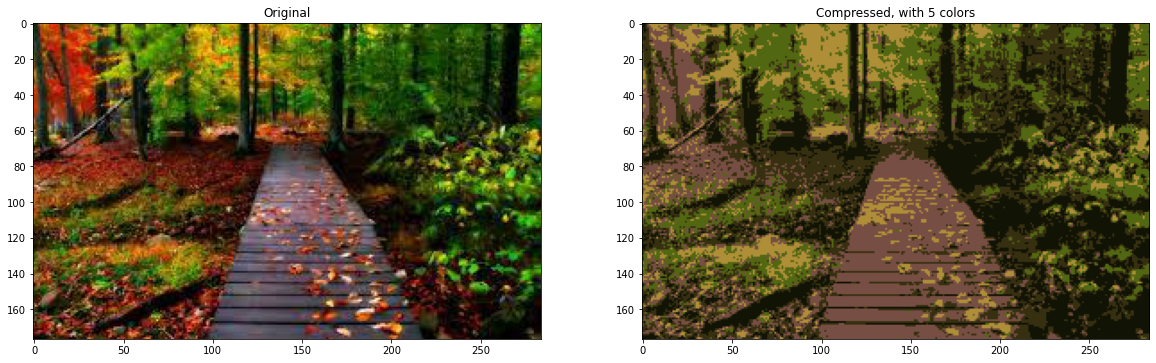

In [41]:
fig, ax = pyplot.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(A)
ax[0].set_title('Original')
ax[0].grid(False)

# Display compressed image, rescale back by 255
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed, with %d colors' % K)
ax[1].grid(False)

## K_means using cv2 madule

In [38]:
original_image  = cv2.imread(os.path.join('images', 'nature.jpg'))
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
vectorized = np.float32(img.reshape((-1,3)))
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 5
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))



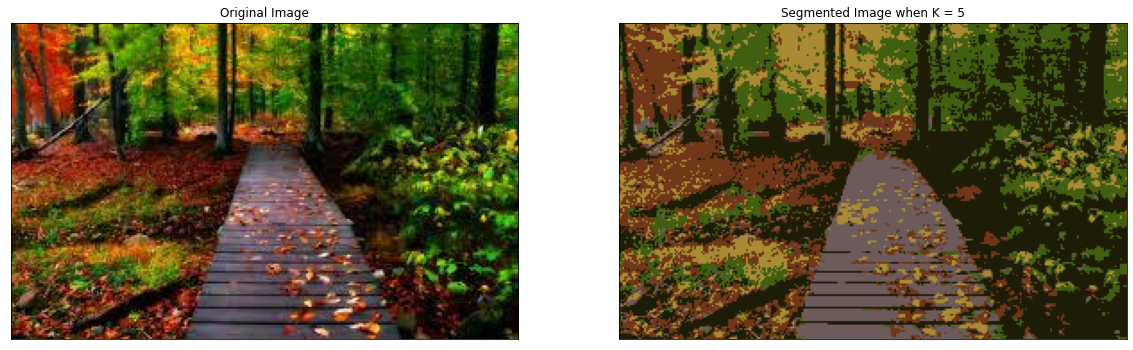

In [39]:

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()


## Vector Quantization by K-means sklearn

In [18]:
original_image  = cv2.imread(os.path.join('images', 'nature.jpg'))
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)

img=np.array(img, dtype=np.float64) / 255
w, h, d = original_shape = tuple(img.shape)
assert d == 3
image_array = np.reshape(img, (w * h, d))
K=5
kmeans = KMeans(n_clusters=K, random_state=0).fit(image_array)
labels = kmeans.predict(image_array)



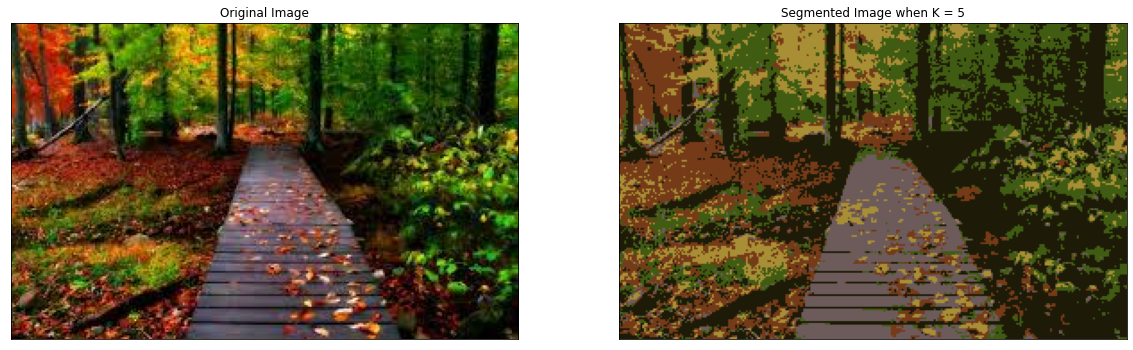

In [20]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(kmeans.cluster_centers_[labels].reshape(w, h, -1))
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()